## Proyecto 3 - Agrupación de datos sobre Obesidad

### Integrantes:



### Informe:

* Reducción de dimensionalidad usando PCA
* Definición de clústeres según hábitos y contraste con la variable objetivo


**Problema**


El caso de estudio busca encontrar patrones de agrupación de características de hábitos alimenticios y condición física. Los datos están compuestos por fatos recolectados de usuarios reales y datos sintéticos.

In [2]:
# importar las librerias necesarias

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

sns.set_style('whitegrid')

In [3]:
# cargar el dataset

df = pd.read_csv('./data_raw/obesity_habits.csv')

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# revisión del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# información del dataset

cat_var = df.select_dtypes(include='object').columns
num_var = df.select_dtypes(include='number').columns

print(f'Variables categóricas: {len(cat_var)}')
print(f'Variables numéricas: {len(num_var)}')
print(f'Número de registros: {df.shape[0]}')
print(f'Número de columnas: {df.shape[1]}')

Variables categóricas: 9
Variables numéricas: 8
Número de registros: 2111
Número de columnas: 17


**Análisis de las variables**

En el dataset se observan 9 variables categóricas y 8 variables numéricas. En estas variables encontramos información sobre los hábitos alimenticios de las personas y algunos datos sobre su descripción física. Las variables `Gender`, `Age`, `Height`, `Weight` y `family_history_with_overweight`, son descriptivas del físico de las personas y su historial de sobrepeso familiar. A continuación graficamos estas variables.

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\580973036.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age', bins=30, kde=True, palette='viridis')


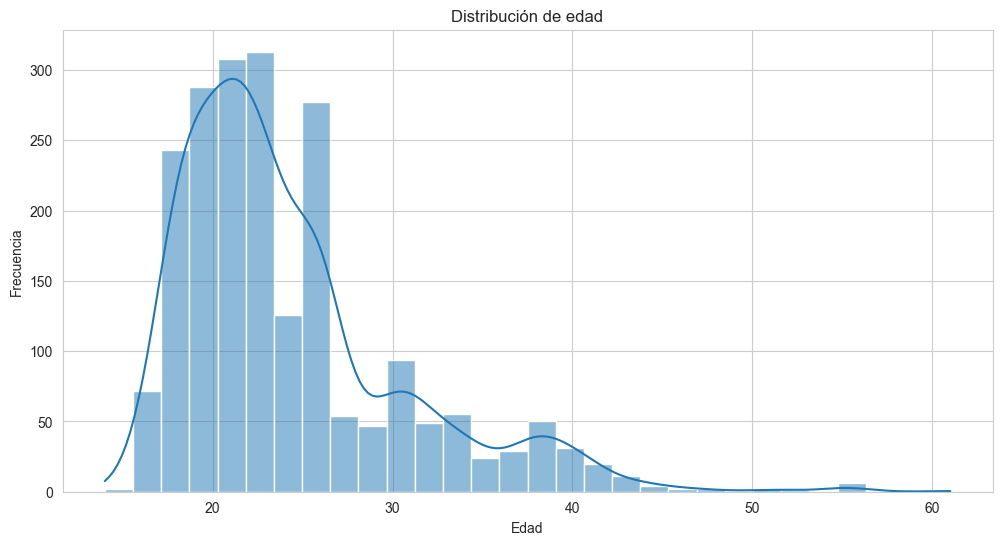

In [6]:
# graficar edad

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='Age', bins=30, kde=True, palette='viridis')
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\3372711409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='viridis')


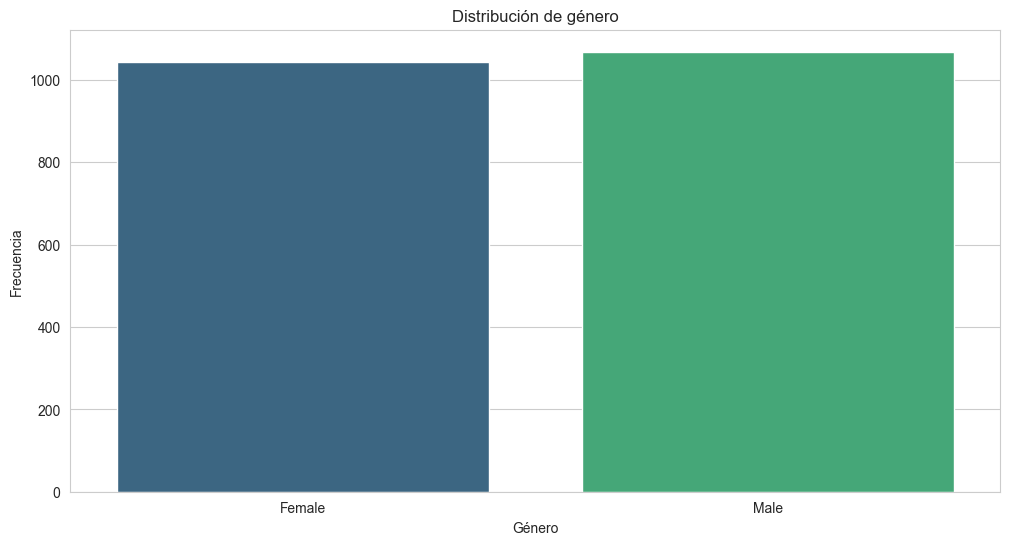

In [7]:
# graficar genero

plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\2532724106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette='viridis')


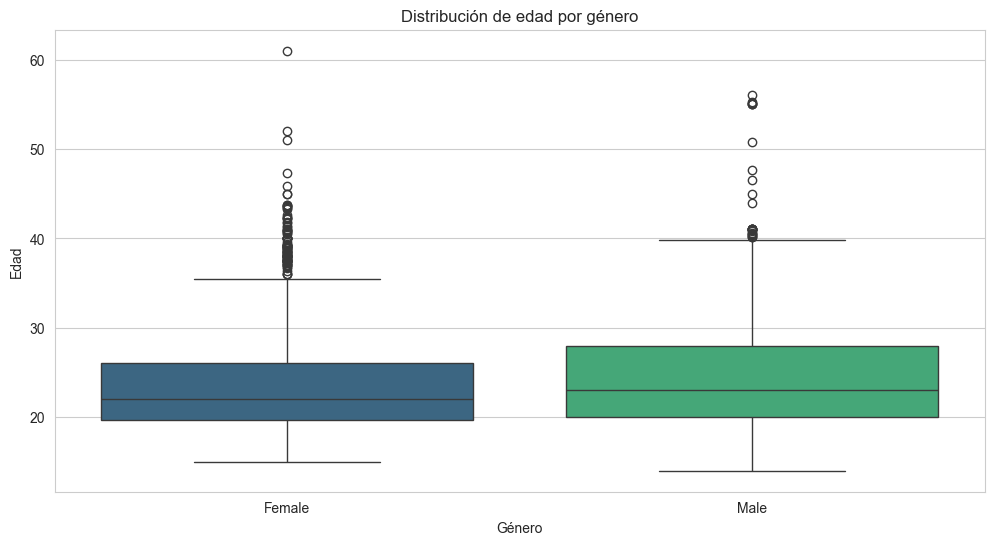

In [8]:
# graficar boxplot de genero y edad

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Gender', y='Age', palette='viridis')
plt.title('Distribución de edad por género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\1172605791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Height', palette='viridis')


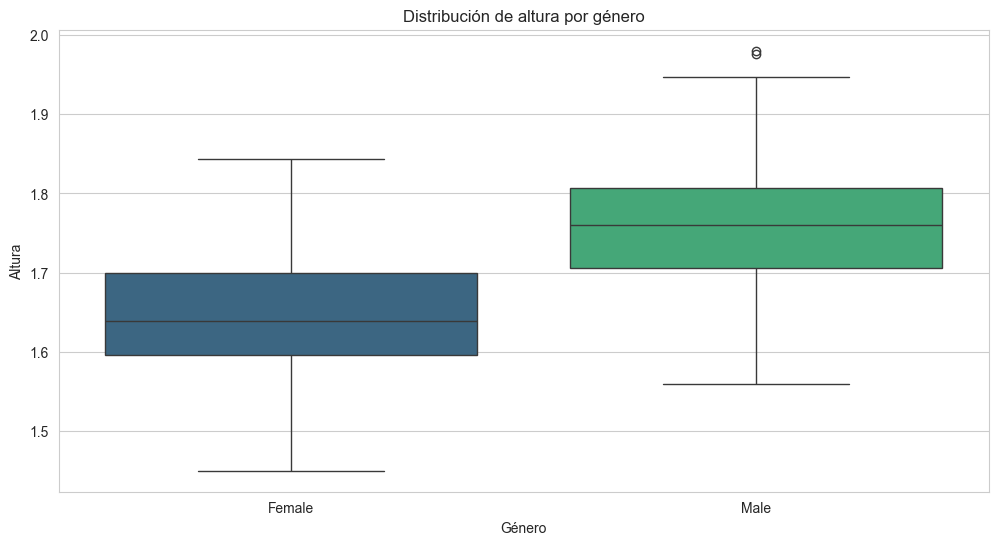

In [9]:
# graficar boxplot de genero y altura

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Gender', y='Height', palette='viridis')
plt.title('Distribución de altura por género')
plt.xlabel('Género')
plt.ylabel('Altura')
plt.show()

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\1877106859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Weight', palette='viridis')


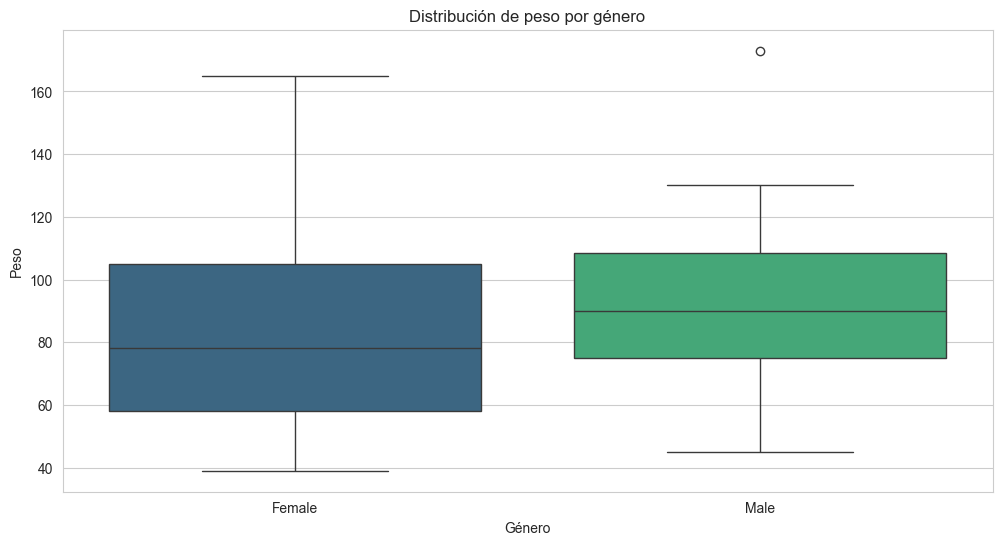

In [10]:
# graficar boxplot de genero y peso

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Gender', y='Weight', palette='viridis')
plt.title('Distribución de peso por género')
plt.xlabel('Género')
plt.ylabel('Peso')
plt.show()

In [11]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

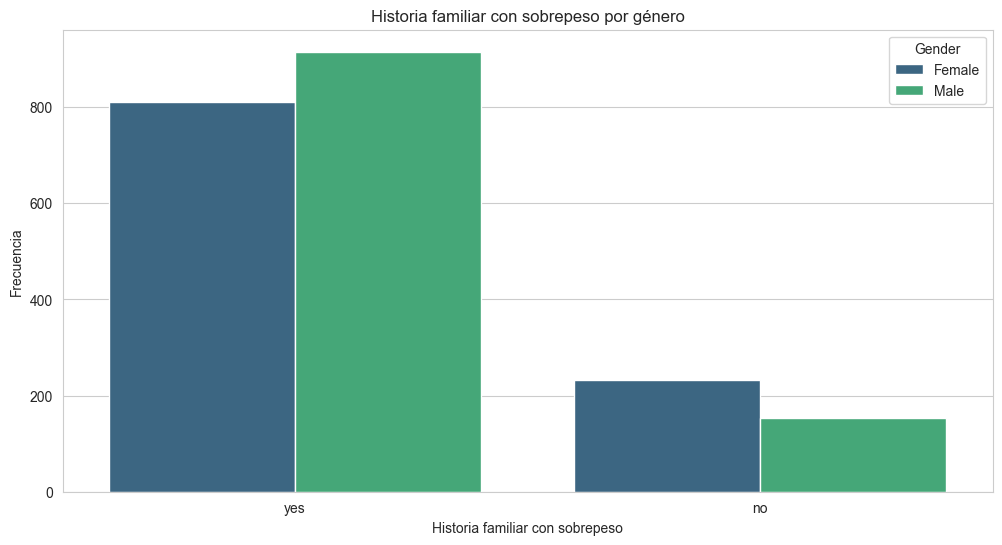

In [12]:
#graficar familia con sobrepeso y genero

plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='family_history_with_overweight', hue='Gender', palette='viridis')
plt.title('Historia familiar con sobrepeso por género')
plt.xlabel('Historia familiar con sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

Encontramos que las variables de descripción física y historial familiar de sobrepeso describen una población, en su gran mayoría, joven, menores a 40 años conalgunos registros de edades hasta los 60 años. Los datos se encuentran balanceados entre hombres y mujeres, así mismo las edades. En cuanto a la altura y el peso se osberva, como es común de la población, los hombres son  más altos que las mujeres y así mismo el peso tiende a se mayor en los hombre, sin embargo, en las mujeres se encuentran datos de peso poco comúnes en relación con la estatura.

A continuación buscaremos las variables más importantes en el dataset para lograr la mejor agrupación posible.

In [13]:
cat_var

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [14]:
# convertir las variables categóricas a numéricas

le = LabelEncoder()

for col in cat_var:
    df[col] = le.fit_transform(df[col])

In [15]:
# agregar la variable BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [16]:
# seleccionar las variables

X = df.drop(columns=['NObeyesdad', 'Height', 'Weight', 'family_history_with_overweight', 'Gender'])
y = df['NObeyesdad']

In [17]:
# seleccionar las características más importantes

selector = SelectKBest(score_func=f_classif, k=6)

X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

selected_features

['Age', 'FAVC', 'FCVC', 'CAEC', 'CALC', 'BMI']

In [18]:
# crear el dataframe con las caracteristicas mas importantes

X_important = df[selected_features]

In [19]:
# escalar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_important)

In [20]:
# encontrar en número óptimo de clusters

inertias = []
silhouette_scores = []

K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

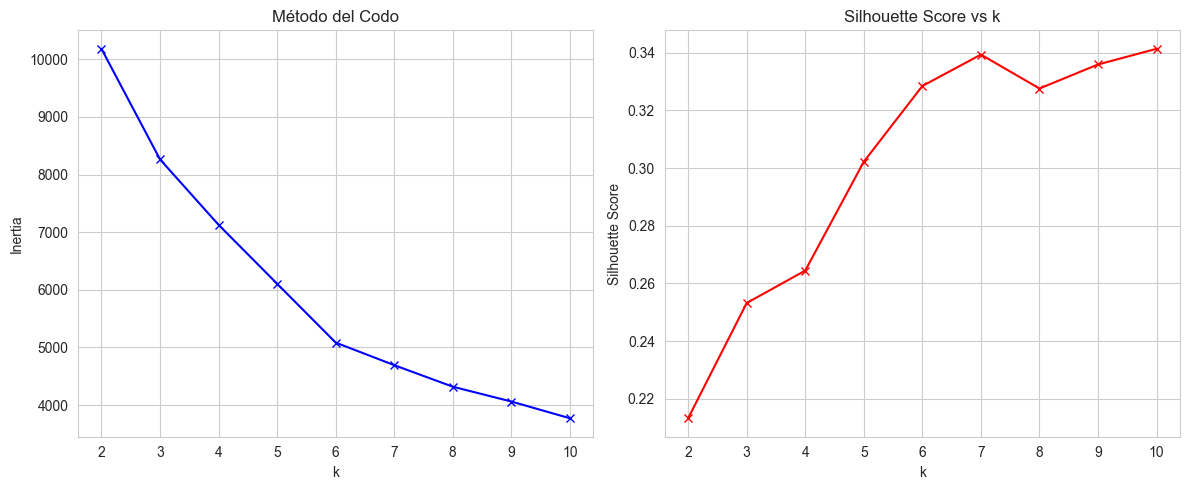

In [21]:
# visualización del método del codo

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

In [30]:
# aplicar kmeans con el número opimo de clusters

optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [31]:
# analizar los clusters

df_results = pd.DataFrame(X_scaled, columns=selected_features)
df_results['cluster'] = clusters
df_results['Obesity_Level'] = y

In [32]:
df_results.head()

,Age,FAVC,FCVC,CAEC,CALC,BMI,cluster,Obesity_Level
0,-0.522124,-2.759769,-0.785019,0.300346,1.419172,-0.663421,2,1
1,-0.522124,-2.759769,1.088342,0.300346,-0.521160,-0.681937,2,1
2,-0.206889,-2.759769,-0.785019,0.300346,-2.461491,-0.740967,2,1
3,0.423582,-2.759769,1.088342,0.300346,-2.461491,-0.355619,2,5
4,-0.364507,-2.759769,-0.785019,0.300346,-0.521160,-0.169522,2,6


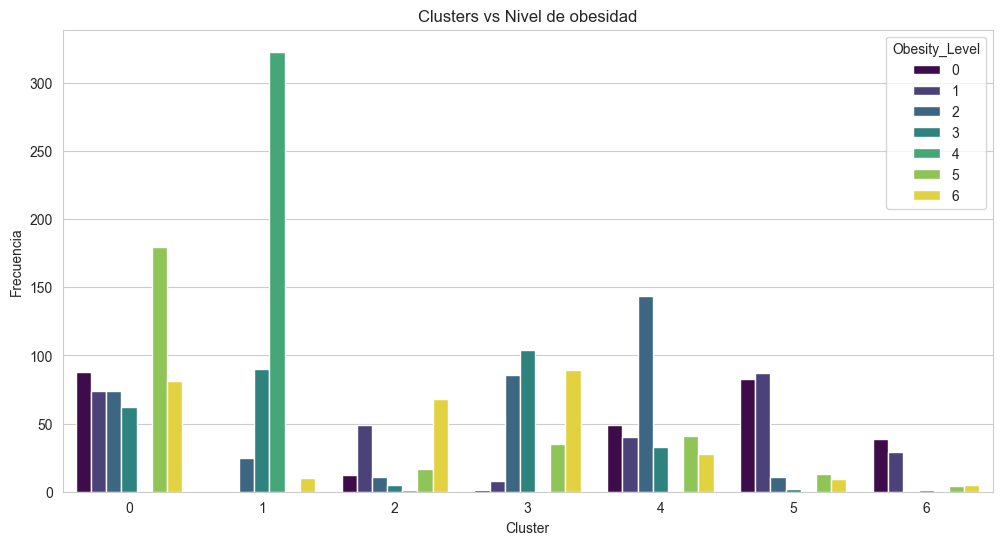

In [33]:
# graficar los clusters vs nivel de obesidad

plt.figure(figsize=(12, 6))

sns.countplot(data=df_results, x='cluster', hue='Obesity_Level', palette='viridis')
plt.title('Clusters vs Nivel de obesidad')
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
# calcular los centroides

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features)

In [35]:
centroids

,Age,FAVC,FCVC,CAEC,CALC,BMI
0,-0.441580,0.362349,-0.521229,0.441646,-0.611407,-0.417422
1,-0.010434,0.362349,0.982344,0.300346,-0.547146,1.322081
2,-0.205911,-2.759769,-0.163178,0.418217,0.276400,-0.471467
3,1.805722,0.323685,-0.188660,0.234253,0.049526,0.238211
4,-0.533356,0.362349,-0.261603,0.313091,1.419172,-0.177748
5,-0.454544,0.362349,-0.087753,-2.250976,0.141393,-1.029342
6,-0.337323,-2.759769,0.569726,-2.162861,0.274874,-1.134434


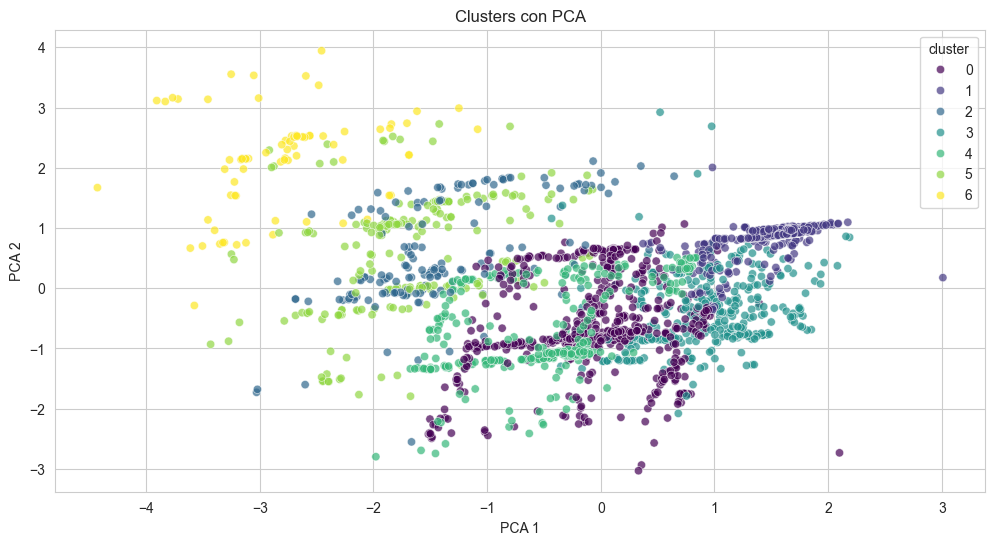

In [36]:
# visualizar los clusters con PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])

df_pca['cluster'] = clusters

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clusters con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

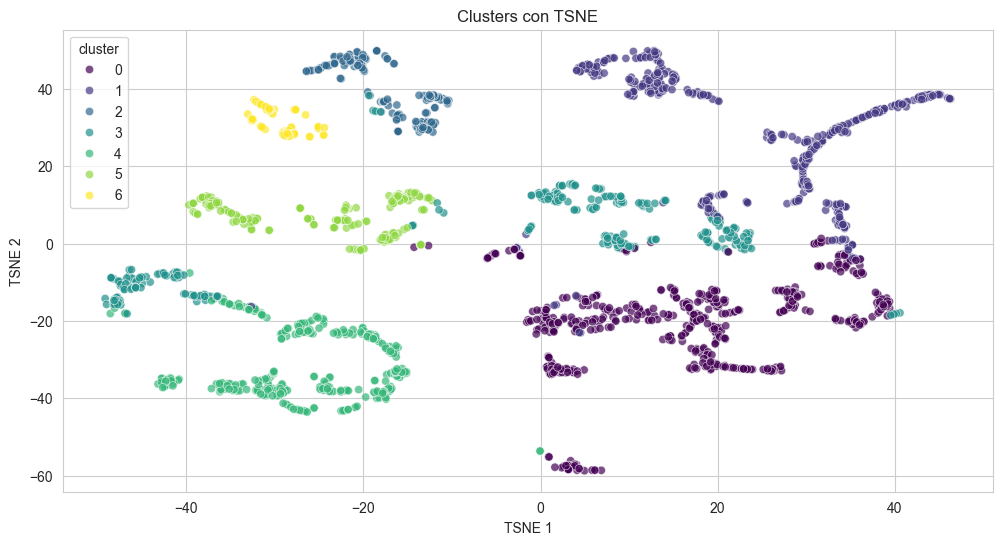

In [37]:
# realizar reducción de dimensionalidad con tsne

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])

df_tsne['cluster'] = clusters

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df_tsne, x='tsne1', y='tsne2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clusters con TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

In [38]:
# aplicar factor analysis para seleccoionar las variables más importantes

fa = FactorAnalysis(n_components=6, random_state=42)
X_fa = fa.fit_transform(X_scaled)

In [ ]:
# analizar importancia de las variables

feature_importance = np.abs(fa.components_).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='importance', 
                                                          ascending=False)

C:\Users\ingen\AppData\Local\Temp\ipykernel_22964\3517938466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


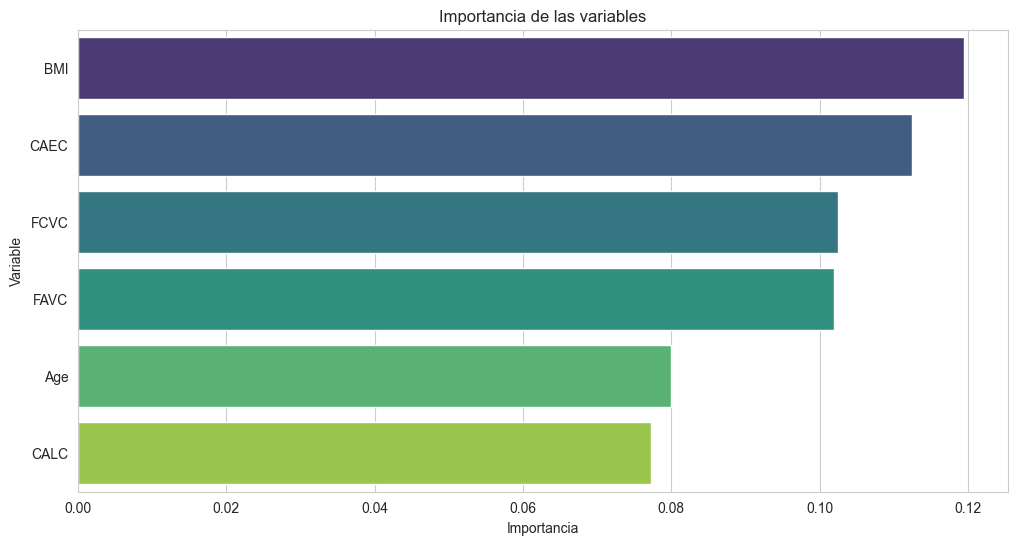

In [47]:
# graficar la importancia de las variables

plt.figure(figsize=(12, 6))

sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

In [61]:
# seleccionar las variables más importantes

top_features = feature_importance_df['feature'].head(6).tolist()

X_important = X[top_features]

In [62]:
# encontrar parámetros optimos para DBSCAN

def find_optimal_eps(X, min_samples_range):
    results = []
    for min_samples in min_samples_range:
        eps_range = np.arange(0.1, 2.1, 0.1)
        for eps in eps_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Verificar si hay más de un cluster y no todos son ruido (-1)
            if len(set(labels)) > 1 and not all(l == -1 for l in labels):
                try:
                    silhouette = silhouette_score(X, labels)
                    calinski = calinski_harabasz_score(X, labels)
                    results.append({
                        'eps': eps,
                        'min_samples': min_samples,
                        'silhouette': silhouette,
                        'calinski': calinski,
                        'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
                    })
                except:
                    continue
    return pd.DataFrame(results)


min_samples_range = [5, 10, 15, 20]
results = find_optimal_eps(X_important, min_samples_range)

In [63]:
# aplicar DBSCAN con los parámetros optimos

optimal_params = results.loc[results['silhouette'].idxmax()]
dbscan = DBSCAN(eps=optimal_params['eps'], min_samples=int(optimal_params['min_samples']))
dbscan_labels = dbscan.fit_predict(X_important)

In [64]:
# comparar resultados con kmeans

result_comparison = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN'],
    'Silhouette Score': [silhouette_score(X_important, clusters), 
                         silhouette_score(X_important, dbscan_labels)],
    'Calinski Harabasz Score': [calinski_harabasz_score(X_important, clusters), 
                                calinski_harabasz_score(X_important, dbscan_labels)]})


print("\nComparación de algoritmos")

print(result_comparison)


Comparación de algoritmos
  Algorithm  Silhouette Score  Calinski Harabasz Score
0    KMeans         -0.106449               522.474700
1    DBSCAN         -0.312626                 2.158514


In [65]:
# seleccionar el mejor modelo

best_model = 'KMeans' if result_comparison['Silhouette Score'][0] > result_comparison['Silhouette Score'][1] else 'DBSCAN'
best_labels = dbscan_labels if result_comparison.iloc[0,1] > result_comparison.iloc[1,1] else clusters

In [66]:
# adicionar los clusters al dataset

df_results['cluster2'] = best_labels

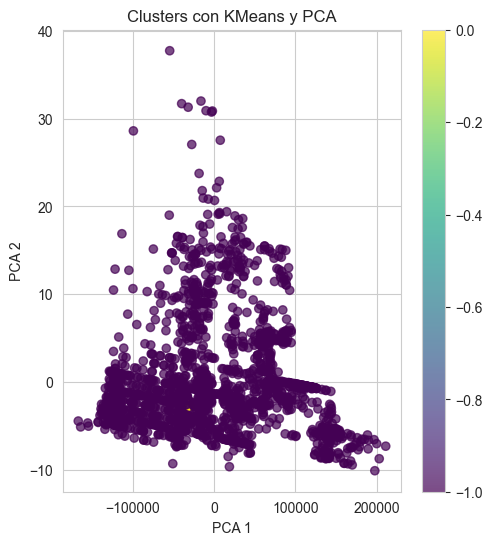

In [67]:
# graficar los resultados

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_important)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
plt.title(f'Clusters con {best_model} y PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)